In [1]:
%pylab inline
import numpy

Populating the interactive namespace from numpy and matplotlib


In [2]:
def panel3(cpu, ram, disk, title=None):
    f, axarr = plt.subplots(3, sharex=True)
    plot1, plot2, plot3 = axarr
    
    plot1.plot(cpu.timesec, cpu.puser, 'b-')
    plot1.set_ylabel('CPU load (%)')
    
    plot2.plot(ram.timesec, ram.kbmemused / 1e6, 'r-')
    plot2.set_ylabel('RAM (GB)')
        
    plot3.plot(disk.timesec, disk.tps, 'r-')
    plot3.set_ylabel('Disk IO (TPS)')
                     
    plot3.set_xlabel('Time (seconds)')
    
    f.set_size_inches(10, 8)
    
    if title:
        plot1.set_title(title)
   
    return f, axarr

In [3]:
import sarparse2
import gzip

In [4]:
# parse sar output
with gzip.open('output.sourmash/cpu.txt.gz', 'rt') as fp:
    sourmash_all_cpu = sarparse2.parse_cpu(fp)
    
with gzip.open('output.sourmash/ram.txt.gz', 'rt') as fp:
    sourmash_all_ram = sarparse2.parse_ram(fp)
    
with gzip.open('output.sourmash/disk.txt.gz', 'rt') as fp:
    sourmash_all_disk = sarparse2.parse_disk(fp)
    
with gzip.open('output.cmash/cpu.txt.gz', 'rt') as fp:
    cmash_all_cpu = sarparse2.parse_cpu(fp)
    
with gzip.open('output.cmash/ram.txt.gz', 'rt') as fp:
    cmash_all_ram = sarparse2.parse_ram(fp)
    
with gzip.open('output.cmash/disk.txt.gz', 'rt') as fp:
    cmash_all_disk = sarparse2.parse_disk(fp)

with gzip.open('output.mash/cpu.txt.gz', 'rt') as fp:
    mash_all_cpu = sarparse2.parse_cpu(fp)
    
with gzip.open('output.mash/ram.txt.gz', 'rt') as fp:
    mash_all_ram = sarparse2.parse_ram(fp)
    
with gzip.open('output.mash/disk.txt.gz', 'rt') as fp:
    mash_all_disk = sarparse2.parse_disk(fp)

In [5]:
def parse_timelog(fp):
    # parse bothie timelog
    events = []
    lines = fp.readlines()
    lines = [ x.strip() for x in lines ]
    for line in lines:
        tup = line.split()
        event = " ".join(tup[2:])

        # do a bad job of parsing date, because sar outputs silly dates anyway, so timezones etc don't matter
        timestr = tup[1]
        timestr = timestr.split('.')[0]
        timestr = timestr.split(':')
        hh, mm, ss = map(int, timestr)
        timesec = hh*3600 + mm*60 + ss
        events.append((timesec, event))
        
    return events
        
with open('output.sourmash/timelog.log') as fp:
    sourmash_events = parse_timelog(fp)
    
sourmash_start_time = sourmash_events[0][0] - 10
sourmash_end_time = sourmash_events[-1][0] + 10

with open('output.cmash/timelog.log') as fp:
    cmash_events = parse_timelog(fp)
    
cmash_start_time = cmash_events[0][0] - 10
cmash_end_time = cmash_events[-1][0] + 10

with open('output.mash/timelog.log') as fp:
    mash_events = parse_timelog(fp)
    
mash_start_time = mash_events[0][0] - 10
mash_end_time = mash_events[-1][0] + 10

In [6]:
def select_df_period(df, start_time, end_time):
    df = df[df.timesec >= start_time]
    df = df[df.timesec < end_time]
    df.timesec -= start_time
    return df
    
sourmash_cpu = select_df_period(sourmash_all_cpu, sourmash_start_time, sourmash_end_time)
sourmash_ram = select_df_period(sourmash_all_ram, sourmash_start_time, sourmash_end_time)
sourmash_disk = select_df_period(sourmash_all_disk, sourmash_start_time, sourmash_end_time)

cmash_cpu = select_df_period(cmash_all_cpu, cmash_start_time, cmash_end_time)
cmash_ram = select_df_period(cmash_all_ram, cmash_start_time, cmash_end_time)
cmash_disk = select_df_period(cmash_all_disk, cmash_start_time, cmash_end_time)

mash_cpu = select_df_period(mash_all_cpu, mash_start_time, mash_end_time)
mash_ram = select_df_period(mash_all_ram, mash_start_time, mash_end_time)
mash_disk = select_df_period(mash_all_disk, mash_start_time, mash_end_time)

(<Figure size 720x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'sourmash'}, ylabel='CPU load (%)'>,
        <AxesSubplot:ylabel='RAM (GB)'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='Disk IO (TPS)'>],
       dtype=object))

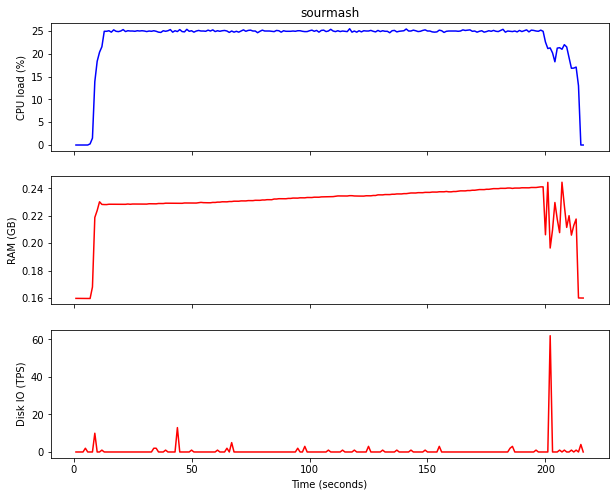

In [7]:
panel3(sourmash_cpu, sourmash_ram, sourmash_disk, title='sourmash')

(<Figure size 720x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'cmash'}, ylabel='CPU load (%)'>,
        <AxesSubplot:ylabel='RAM (GB)'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='Disk IO (TPS)'>],
       dtype=object))

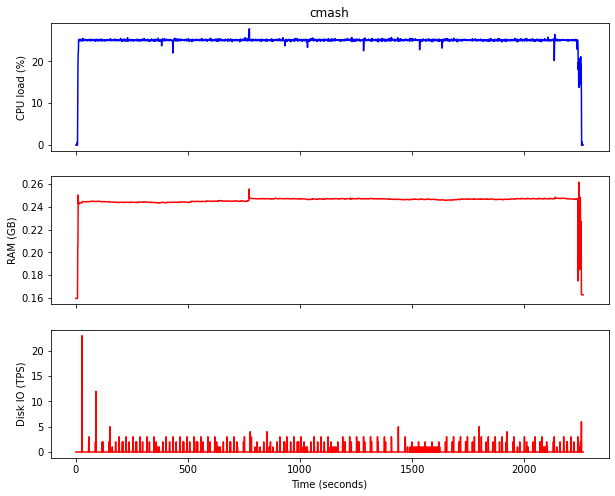

In [8]:
panel3(cmash_cpu, cmash_ram, cmash_disk, title='cmash')

(<Figure size 720x576 with 3 Axes>,
 array([<AxesSubplot:title={'center':'mash'}, ylabel='CPU load (%)'>,
        <AxesSubplot:ylabel='RAM (GB)'>,
        <AxesSubplot:xlabel='Time (seconds)', ylabel='Disk IO (TPS)'>],
       dtype=object))

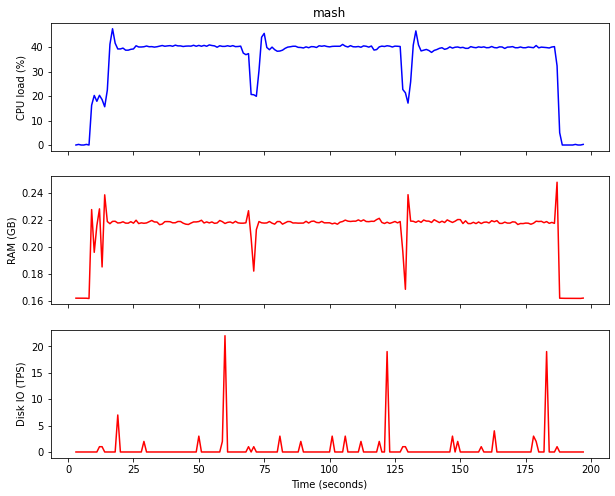

In [9]:
panel3(mash_cpu, mash_ram, mash_disk, title='mash')